In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

In [ ]:
datafile = pd.read_csv('mallcustomer.csv')
datafile.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
datafile.shape

(200, 5)

In [ ]:
X = datafile.iloc[:,:-1].values

In [ ]:
Y = datafile.iloc[:,4]

In [ ]:

from sklearn.preprocessing import LabelEncoder
lblencode = LabelEncoder()
X[:,1] = lblencode.fit_transform(X[:,1])
X

array([[1, 1, 19, 15],
       [2, 1, 21, 15],
       [3, 0, 20, 16],
       [4, 0, 23, 16],
       [5, 0, 31, 17],
       [6, 0, 22, 17],
       [7, 0, 35, 18],
       [8, 0, 23, 18],
       [9, 1, 64, 19],
       [10, 0, 30, 19],
       [11, 1, 67, 19],
       [12, 0, 35, 19],
       [13, 0, 58, 20],
       [14, 0, 24, 20],
       [15, 1, 37, 20],
       [16, 1, 22, 20],
       [17, 0, 35, 21],
       [18, 1, 20, 21],
       [19, 1, 52, 23],
       [20, 0, 35, 23],
       [21, 1, 35, 24],
       [22, 1, 25, 24],
       [23, 0, 46, 25],
       [24, 1, 31, 25],
       [25, 0, 54, 28],
       [26, 1, 29, 28],
       [27, 0, 45, 28],
       [28, 1, 35, 28],
       [29, 0, 40, 29],
       [30, 0, 23, 29],
       [31, 1, 60, 30],
       [32, 0, 21, 30],
       [33, 1, 53, 33],
       [34, 1, 18, 33],
       [35, 0, 49, 33],
       [36, 0, 21, 33],
       [37, 0, 42, 34],
       [38, 0, 30, 34],
       [39, 0, 36, 37],
       [40, 0, 20, 37],
       [41, 0, 65, 38],
       [42, 1, 24, 38],
 

##Missing Value Detection and Imputation

In [ ]:
data = pd.read_csv('realestate.csv')
print(data['ST_NUM'].isnull())

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


In [ ]:
print(data['NUM_BEDROOMS'].isnull())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


In [ ]:
missing_value = ["n/a","na","--"]
data1 = pd.read_csv('realestate.csv', na_values = missing_value)
data = data1

In [ ]:
print(data['NUM_BEDROOMS'].isnull())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool


In [ ]:
print(data['OWN_OCCUPIED'].isnull())

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool


In [ ]:
count = 0
for row in data['OWN_OCCUPIED']:
    try:
        int(row)
        data.loc[count, 'OWN_OCCUPIED '] = np.nan
    except ValueError:
        pass
    count+=1

In [17]:
print(data['OWN_OCCUPIED'].isnull())

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool


In [18]:
print(data.isnull().sum())

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           1
dtype: int64


In [19]:
print(data.isnull().values.any())

True


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

# create a list of data 
data = [1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,
1] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Positive Skewed']) 
  
# print dataframe. 
df

,Positive Skewed
0,1
1,1
2,10
3,10
4,15
5,15
6,20
7,20
8,30
9,50


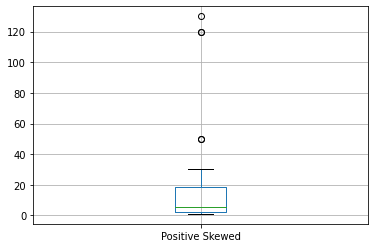

In [24]:
#Boxplot showing three outliers
df.boxplot(column='Positive Skewed')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


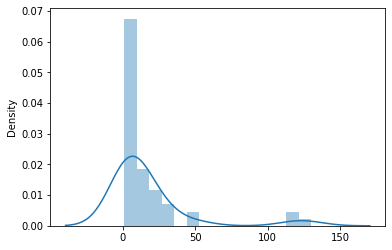

In [25]:
#Right Skewed data
sns.distplot(df)

In [26]:
#Creating input data from dataframe df on variable Positive Skewness with input values ranging from 1 to 130
inp_array = df 
print ("Input array : ", inp_array)

Input array :      Positive Skewed
0                 1
1                 1
2                10
3                10
4                15
5                15
6                20
7                20
8                30
9                50
10              120
11              130
12              120
13               50
14               30
15               30
16               25
17               20
18               20
19               15
20               15
21               13
22               11
23                9
24                7
25                6
26                6
27                5
28                5
29                5
30                4
31                4
32                4
33                4
34                3
35                3
36                3
37                3
38                2
39                2
40                2
41                2
42                2
43                1
44                1
45                1
46                1
47                1
48   

In [27]:
#Applying log10 transformation with output values ranging from 0 to 2+
out_array = np.log10(inp_array) 
print ("Output array : ", out_array)


Output array :      Positive Skewed
0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          1.176091
5          1.176091
6          1.301030
7          1.301030
8          1.477121
9          1.698970
10         2.079181
11         2.113943
12         2.079181
13         1.698970
14         1.477121
15         1.477121
16         1.397940
17         1.301030
18         1.301030
19         1.176091
20         1.176091
21         1.113943
22         1.041393
23         0.954243
24         0.845098
25         0.778151
26         0.778151
27         0.698970
28         0.698970
29         0.698970
30         0.602060
31         0.602060
32         0.602060
33         0.602060
34         0.477121
35         0.477121
36         0.477121
37         0.477121
38         0.301030
39         0.301030
40         0.301030
41         0.301030
42         0.301030
43         0.000000
44         0.000000
45         0.000000
46         0.000000
47         0.000000
48  

###Boxplot showing No outliers with all of them treated by doing log10 transformation.

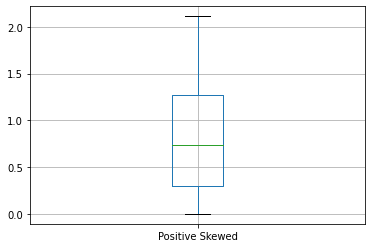

In [28]:
out_array.boxplot(column='Positive Skewed')
plt.show()

###Right Skewed data transformed to Fairly or close to Normal Distribution using Log10 transformations

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


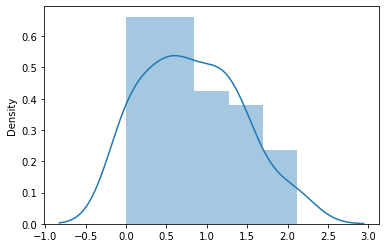

In [29]:
sns.distplot(out_array)

###If wants to revert back log10 values to original value for interpretation purpose then just raise 10 to the power 
#log10 values as shown below.

In [30]:
original_val = (10**out_array) 
print ("Original Values : ", original_val)

Original Values :      Positive Skewed
0               1.0
1               1.0
2              10.0
3              10.0
4              15.0
5              15.0
6              20.0
7              20.0
8              30.0
9              50.0
10            120.0
11            130.0
12            120.0
13             50.0
14             30.0
15             30.0
16             25.0
17             20.0
18             20.0
19             15.0
20             15.0
21             13.0
22             11.0
23              9.0
24              7.0
25              6.0
26              6.0
27              5.0
28              5.0
29              5.0
30              4.0
31              4.0
32              4.0
33              4.0
34              3.0
35              3.0
36              3.0
37              3.0
38              2.0
39              2.0
40              2.0
41              2.0
42              2.0
43              1.0
44              1.0
45              1.0
46              1.0
47              1.0
4

##Square Root Transformation for Positive or Right Skewed Data

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

# Create a list of data. Here, we have included zeros as well in the data
data = [0,0,1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,
1,0,0] 
  
# Create the pandas DataFrame 
df2 = pd.DataFrame(data, columns = ['Positive Skewed']) 
  
# print dataframe. 
df2


,Positive Skewed
0,0
1,0
2,1
3,1
4,10
5,10
6,15
7,15
8,20
9,20


###Boxplot showing three outliers

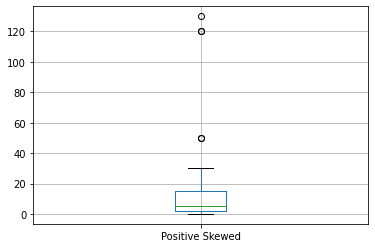

In [32]:
df2.boxplot(column='Positive Skewed')
plt.show()

###Right Skewed data 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


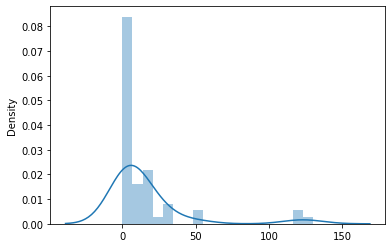

In [33]:
 
sns.distplot(df2)

###Creating input data from dataframe df on variable Positive Skewness with input values ranging from 0 to 130

In [34]:

inp_array2 = df2 
print ("Input array : ", inp_array2)

Input array :      Positive Skewed
0                 0
1                 0
2                 1
3                 1
4                10
5                10
6                15
7                15
8                20
9                20
10               30
11               50
12              120
13              130
14              120
15               50
16               30
17               30
18               25
19               20
20               20
21               15
22               15
23               13
24               11
25                9
26                7
27                6
28                6
29                5
30                5
31                5
32                4
33                4
34                4
35                4
36                3
37                3
38                3
39                3
40                2
41                2
42                2
43                2
44                2
45                1
46                1
47                1
48   

###Applying Square Root transformation with output values ranging from 0 to 11+

In [35]:

out_array2 = np.sqrt(inp_array2) 
print ("Output array : ", out_array2)

Output array :      Positive Skewed
0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          3.162278
5          3.162278
6          3.872983
7          3.872983
8          4.472136
9          4.472136
10         5.477226
11         7.071068
12        10.954451
13        11.401754
14        10.954451
15         7.071068
16         5.477226
17         5.477226
18         5.000000
19         4.472136
20         4.472136
21         3.872983
22         3.872983
23         3.605551
24         3.316625
25         3.000000
26         2.645751
27         2.449490
28         2.449490
29         2.236068
30         2.236068
31         2.236068
32         2.000000
33         2.000000
34         2.000000
35         2.000000
36         1.732051
37         1.732051
38         1.732051
39         1.732051
40         1.414214
41         1.414214
42         1.414214
43         1.414214
44         1.414214
45         1.000000
46         1.000000
47         1.000000
48  

###Boxplot showing only Two outliers now, with one of those treated by doing Square Root transformation.

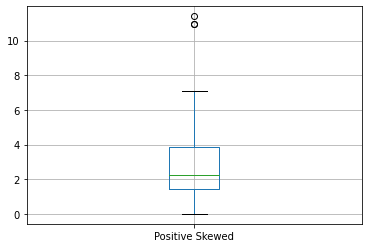

In [36]:

out_array2.boxplot(column='Positive Skewed')
plt.show()

###Right Skewed data transformed to Fairly or close to Normal Distribution using Square Root transformations, though not perfect
#Normal Distribution since this type of transformation has moderate effect on distribution shape

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


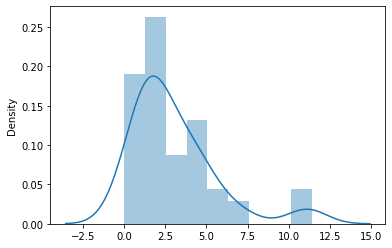

In [37]:

sns.distplot(out_array2)